# Bilby MCMC Demo

Following tutorial here: https://bilby-dev.github.io/bilby/basics-of-parameter-estimation.html

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bilby
from bilby.core.utils import random


In [11]:
# set up
random.seed(123)
label = "linear_regression"
outdir = "outdir"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

# define signal model
def model(time, m, c):
    return time * m + c

# these are the parameters we will use to generate the data
injection_parameters = dict(m=0.5, c=0.2)

# generate data
sampling_frequency = 10 
time_duration = 10
time = np.arange(0, time_duration, 1 / sampling_frequency) 
N = len(time)
sigma = random.rng.normal(1, 0.01, N)
data = model(time, **injection_parameters) + random.rng.normal(0, sigma, N)

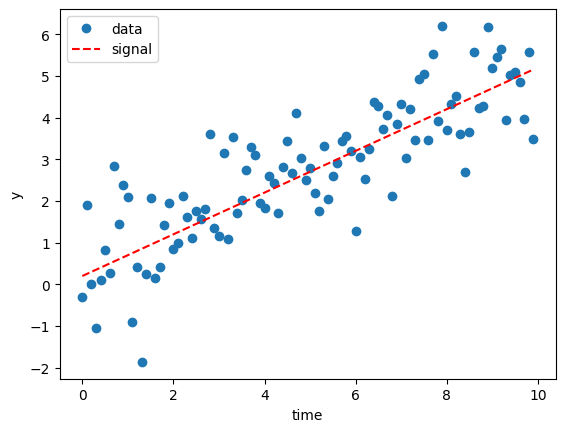

In [12]:
# We quickly plot the data to check it looks sensible
fig, ax = plt.subplots()
ax.plot(time, data, "o", label="data")
ax.plot(time, model(time, **injection_parameters), "--r", label="signal")
ax.set_xlabel("time")
ax.set_ylabel("y")
ax.legend()
fig.savefig("{}/{}_data.png".format(outdir, label))

In [13]:
# define the likelihood based on the Gaussian noise model
likelihood = bilby.core.likelihood.GaussianLikelihood(time, data, model, sigma)

# make priors
priors = dict()
priors["m"] = bilby.core.prior.Uniform(0, 5, "m")
priors["c"] = bilby.core.prior.Uniform(-2, 2, "c")

In [14]:
# run MCMC sampler
result = bilby.run_sampler(
    likelihood=likelihood, # likelihood function
    priors=priors, # prior distributions
    sampler="dynesty", 
    nlive=250,
    injection_parameters=injection_parameters, # used for validation
    outdir=outdir,
    label=label,
    plot=True
)

09:38 bilby INFO    : Running for label 'linear_regression', output will be saved to 'outdir'
09:38 bilby INFO    : Analysis priors:
09:38 bilby INFO    : m=Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)
09:38 bilby INFO    : c=Uniform(minimum=-2, maximum=2, name='c', latex_label='c', unit=None, boundary=None)
09:38 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
09:38 bilby INFO    : Analysis likelihood noise evidence: nan
09:38 bilby INFO    : Single likelihood evaluation took 1.602e-05 s
09:38 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:38 bilby INFO    : Checkpoint every check_point_delta_t = 600s
09:38 bilby WARNING : Using cached result
09:38 bilby

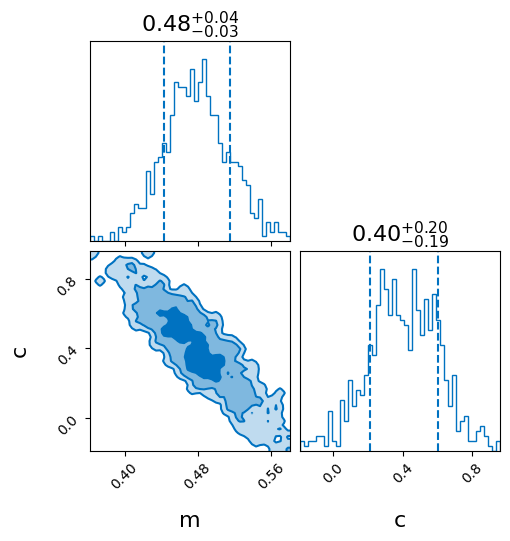

In [15]:
result.plot_corner()